#  9/2 - Internet sebesség vizualizáció

## Beolvasás

Olvasd be a `./data/rpi_data_compact.csv` fájlt egy Pandas dataframe-be and és írd ki az első három sorát.

In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('data/rpi_data_compact.csv')

In [13]:
df.head(3)

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25


## Adat megtisztítása

Szűrjük ki a felesleges oszlopokat!

In [14]:
df = df.drop(columns=['Unnamed: 0'])
df.head(3)

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25


Gyakran előfordul, hogy adathalmazunkból bizonyos értékek hiányoznak. Ezért fontos kiszűrni az ilyen értékeket. 

Az `dataframe` `isNull()` metódusa egy olyan `dataframe`-et ad vissza, mely `bool` oszlopokból áll, ahol egy érték pontosan akkor `True`, ha az eredeti dataframe azonos koordinátájú cellájában nem szerepelt érték.

In [15]:
is_null_df = df.isnull()
is_null_df.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


A `sum()` függvény oszloponkénti összegzést végez. Egy `Series` (lényegében egy egyoszlopos dataframe) objektumot ad vissza, melynek elemei az adott oszlopok összeget tartalmazza. (`True = 1`, `False = 0`).

In [16]:
nulls_per_column = is_null_df.sum()
print(type(nulls_per_column))
nulls_per_column.head()

<class 'pandas.core.series.Series'>


Ping (ms)            1
Download (Mbit/s)    1
Upload (Mbit/s)      7
Date                 7
Time                 7
dtype: int64

In [17]:
nulls_per_column.sum()

23

Határozzuk meg az értékek hány százaléka hiányzik! Használjuk a `numpy.round()` függvényt!

In [18]:
total = float(len(df) * len(df.columns))
null = df.isnull().sum().sum()

null_percentage = np.round((null / total) * 100, decimals = 4)
print(f'{null_percentage}%')

0.6765%


A `dropna` metódus segítségével eltüntethetjük az üres értékeket tartalmazó sorokat.

In [19]:
print(len(df))
df = df.dropna()
print(len(df))

680
673


(Megjegyzés: ez eltér a korábban látott 23-tól mert előfordul olyan hogy több null is van egy sorban.)

### Adatok formátuma

A pandas nem mindig tudja megfelelő módon kikövetkeztetni az oszlopok típusait:

In [20]:
df.dtypes

Ping (ms)             object
Download (Mbit/s)     object
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

Persze mi tudjuk, hogy `ping` és `download` oszlopok is lebegőpontos számok, valamilyen oknál fogva mégsem tudta kikövetkezetni automatikusan.

A típuskonverzió több módon is elvégezhető:
- Ha csak konverziót akarunk végezni ezt a `to_*` jellegű metódusokkal tudjuk megtenni.
- Ha komplexebb logika alapján akarunk konverziót végezni azt az `apply` függvénnyel tehetjük meg

In [21]:
df['Ping (ms)'] = pd.to_numeric(df['Ping (ms)'])
df['Download (Mbit/s)'] = df['Download (Mbit/s)'].apply(pd.to_numeric)
# metódusreferencia a pd.to_numeric függvényre

df.dtypes

Ping (ms)            float64
Download (Mbit/s)    float64
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

A dataframe oszlopainak sorrendje megváltoztatható a `reindex` metódussal.

In [22]:
df = df.reindex(columns = ['Date', 'Time', 'Ping (ms)','Download (Mbit/s)','Upload (Mbit/s)'])
df.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


A megtisztított adatokat a következő módon menthetjük ki egy CSV fájlba:

In [25]:
df.to_csv('./rpi_data_processed.csv', index=False) # sor index szerepljen-e a CSV fájlban

## Statisztikák

Ezek a `mean()` and `std()` metódusokkal adhatóak meg (hasonlóan a `sum()`-hoz ezek is `Series`-t adnak vissza). A `numeric_only=True` esetén csak a számként értelmezhető oszlopok esetén számolja ki a statisztikát.

### Átlag  

In [28]:
df.mean(numeric_only=True) # átlag 

Ping (ms)            21.115452
Download (Mbit/s)    90.449212
Upload (Mbit/s)      13.697608
dtype: float64

### Szórás

In [27]:
df.std(numeric_only=True) # szórás

Ping (ms)            5.161225
Download (Mbit/s)    3.465647
Upload (Mbit/s)      1.080471
dtype: float64

### Min

In [29]:
df.min()

Date                 2016-11-24
Time                   13:36:25
Ping (ms)                16.167
Download (Mbit/s)         58.48
Upload (Mbit/s)            6.21
dtype: object

### Max

In [30]:
df.max()

Date                 2016-11-24
Time                   19:18:16
Ping (ms)                76.528
Download (Mbit/s)         92.87
Upload (Mbit/s)           14.55
dtype: object

### `describe`
A `describe` metódus egy dataframe-et ad vissza melynek oszlopai az eredeti dataframe oszlopai sorai pedig az adott statisztikák.

In [31]:
df.describe()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
count,673.000000,673.000000,673.000000
mean,21.115452,90.449212,13.697608
std,5.161225,3.465647,1.080471
min,16.167000,58.480000,6.210000
25%,19.115000,90.220000,13.640000
50%,20.322000,91.560000,13.980000
75%,21.843000,92.070000,14.180000
max,76.528000,92.870000,14.550000


### `argmin`, `argmax`, `iloc`.

`argmin` and `argmax` metódusok, az adott szélső érték érték indexét adják vissza.

In [38]:
min_ping_idx = df['Ping (ms)'].argmin()
max_ping_idx = df['Ping (ms)'].argmax()

min_download_idx = df['Download (Mbit/s)'].argmin()
max_download_idx = df['Download (Mbit/s)'].argmax()

min_upload_idx = df['Upload (Mbit/s)'].argmin()
max_upload_idx = df['Upload (Mbit/s)'].argmax()

A dataframe adott indexű sora `iloc` metóduson (vagy indexen őszintén nem tudom, borzalmas ez a könyvtár) keresztül érhető el.

In [39]:
print(f'Ping reached minimum on {df.iloc[min_ping_idx]["Date"]} at {df.iloc[min_ping_idx]["Time"]}')
print(f'Ping reached maximum on {df.iloc[max_ping_idx]["Date"]} at {df.iloc[max_ping_idx]["Time"]}')
print(f'Download reached minimum on {df.iloc[min_download_idx]["Date"]} at {df.iloc[min_download_idx]["Time"]}')
print(f'Download reached maximum on {df.iloc[max_download_idx]["Date"]} at {df.iloc[max_download_idx]["Time"]}')
print(f'Upload reached minimum on {df.iloc[min_upload_idx]["Date"]} at {df.iloc[min_upload_idx]["Time"]}')
print(f'Upload reached maximum on {df.iloc[max_upload_idx]["Date"]} at {df.iloc[max_upload_idx]["Time"]}')

Ping reached minimum on 2016-11-24 at 15:26:20
Ping reached maximum on 2016-11-24 at 17:30:06
Download reached minimum on 2016-11-24 at 14:57:55
Download reached maximum on 2016-11-24 at 17:02:49
Upload reached minimum on 2016-11-24 at 17:31:47
Upload reached maximum on 2016-11-24 at 18:02:15


### Korreláció

In [41]:
df_corr = df.corr(numeric_only=True)
df_corr

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
Ping (ms),1.000000,-0.045626,-0.463099
Download (Mbit/s),-0.045626,1.000000,0.083690
Upload (Mbit/s),-0.463099,0.083690,1.000000


In [42]:
corr = df_corr.values
print('Correlation coefficient between ping and download: {}'.format(corr[0, 1]))
print('Correlation coefficient between ping and upload: {}'.format(corr[0, 2]))
print('Correlation coefficient between upload and download: {}'.format(corr[2, 1]))

Correlation coefficient between ping and download: -0.04562611025837897
Correlation coefficient between ping and upload: -0.4630987138300179
Correlation coefficient between upload and download: 0.0836899693372496


Láthatjuk, hogy egyik korreláció sem erős.

## Vizualizácó

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline 

Ábrázoljuk a következő három függvényt:
1. ping (ms) az idő függvényében,
2. upload (Mbit/s) az idő függvényében,
3. download (Mbit/s) as a function of time.

A `legend()` metódussal hozzunk létre jelmagyarázatot.

C:\Users\bb200\AppData\Local\Temp\ipykernel_20860\2910128741.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  t = pd.to_datetime(df['Time']) # x-tengely


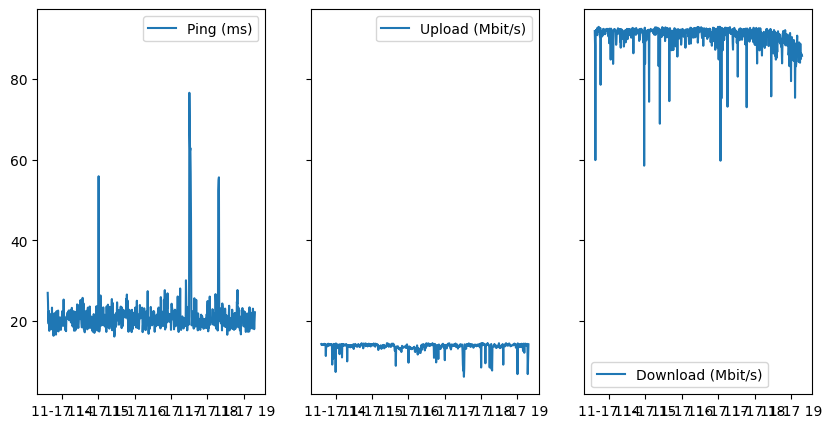

In [46]:
fig, (ax, ay, az) = plt.subplots(1, 3, figsize=(10, 5))

t = pd.to_datetime(df['Time']) # x-tengely

ax.plot(t, df['Ping (ms)'], label='Ping (ms)')
ay.plot(t, df['Upload (Mbit/s)'], label='Upload (Mbit/s)')
az.plot(t, df['Download (Mbit/s)'], label='Download (Mbit/s)')

ax.legend()
ay.legend()
az.legend()
plt.show()

### Megjelenés testreszabása

In [ ]:
# Initialise figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot three curves. Ping data 
# is visualized using dots
t = pd.to_datetime(df['Time'])

#ax.plot(...
#ax.plot(...
#ax.plot(...

# Insert legend

###### d) Add axis labels.

A plot without axis labels, and perhaps a title, is difficult to understand, as one cannot know for sure which quantities are being depicted. Make the above graph compliant with standard scientific practice by adding axis labels and a title. Specify a fontsize of about 16, so that title and labels are printed nice and clear. 

In [ ]:
# Initialise figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot three curves
t = pd.to_datetime(df['Time'])
ax.plot(t, df['Ping (ms)'], 'o', label='Ping (ms)')
ax.plot(t, df['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df['Download (Mbit/s)'], label='Download (Mbit/s)')

# Insert legend
ax.legend()

# Add axis labels and title
#ax.set_xlabel(...
#ax.set_ylabel(...
#ax.set_title(...

# Change tick size
ax.tick_params(labelsize=14)

###### e)  Change the plot theme.
Use the `'fivethirtyeight'` [style context](http://matplotlib.org/examples/style_sheets/plot_fivethirtyeight.html) to make the previous graph more visually appealing. To do this, add the row with the `with` statement to your code, before calling the `Matplotlib` functions.

In [ ]:
# Use a style context
#with ...

    # Initialise figure
    #fig, ax = 
    
    # Plot ping as a function of time
 
    # Add axis labels and title
    
    # Change tick size

###### f) Create a Histogram.

A histogram is a graphical representation of the frequency of the values of numerical data. Examine the code below. An additional level of complexity is the use of subplots to display the histograms side-by-side. 

In [ ]:
with plt.style.context('fivethirtyeight'):
    
    nbins = 100
    # Initialize figure
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0][0].hist(df['Ping (ms)'], nbins)
    ax[0][0].set_xlabel('Ping (ms)', fontsize=16)
    ax[0][0].tick_params(labelsize=14)
    ax[0][1].hist(df['Upload (Mbit/s)'], nbins)
    ax[0][1].set_xlabel('Upload (Mbit/s)', fontsize=16)
    ax[0][1].tick_params(labelsize=14)
    ax[1][0].hist(df['Download (Mbit/s)'], nbins)
    ax[1][0].set_xlabel('Download (Mbit/s)', fontsize=16)
    ax[1][0].tick_params(labelsize=14)
    ax[1][1].set_visible(False)